<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-первичный-анализ-таблицы" data-toc-modified-id="Загрузка-и-первичный-анализ-таблицы-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и первичный анализ таблицы</a></span></li><li><span><a href="#Проведите-исследовательский-анализ-данных-(EDA)" data-toc-modified-id="Проведите-исследовательский-анализ-данных-(EDA)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Проведите исследовательский анализ данных (EDA)</a></span><ul class="toc-item"><li><span><a href="#Первичное-исследование-данных" data-toc-modified-id="Первичное-исследование-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Первичное исследование данных</a></span></li><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Сравнение-тех,-кто-ушел-в-отток-и-тех,-кто-остался" data-toc-modified-id="Сравнение-тех,-кто-ушел-в-отток-и-тех,-кто-остался-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Сравнение тех, кто ушел в отток и тех, кто остался</a></span></li></ul></li><li><span><a href="#Построение-моделей-прогнозирования-оттока-клиентов" data-toc-modified-id="Построение-моделей-прогнозирования-оттока-клиентов-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Построение моделей прогнозирования оттока клиентов</a></span></li><li><span><a href="#Кластеризация-клиентов" data-toc-modified-id="Кластеризация-клиентов-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Кластеризация клиентов</a></span><ul class="toc-item"><li><span><a href="#Матрица-расстояний-и-дендрограмма" data-toc-modified-id="Матрица-расстояний-и-дендрограмма-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Матрица расстояний и дендрограмма</a></span></li><li><span><a href="#Модель-кластеризации-на-основании-алгоритма-K-Means" data-toc-modified-id="Модель-кластеризации-на-основании-алгоритма-K-Means-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Модель кластеризации на основании алгоритма K-Means</a></span></li></ul></li><li><span><a href="#Общий-вывод-и-рекомендации" data-toc-modified-id="Общий-вывод-и-рекомендации-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод и рекомендации</a></span></li></ul></div>

# <p style='text-align: center;'> Проект по машинному обучению </p><a class="tocSkip">
    
«Культурист-датасаентист» предоставил сведения в csv-файлах. Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. Набор данных включает следующие поля:
Данные клиента за предыдущий до проверки факта оттока месяц:

* 'gender' — пол;
* 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
* 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
* Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
* 'Phone' — наличие контактного телефона;
* 'Age' — возраст;
* 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).


Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:


* 'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
* 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
* 'Group_visits' — факт посещения групповых занятий;
* 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
* 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
* 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
* 'Churn' — факт оттока в текущем месяце.


Задача — провести анализ и подготовить план действий по удержанию клиентов.А именно:

* спрогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
* сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
* проанализировать основные признаки, наиболее сильно влияющие на отток;
* сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:

1) выделить целевые группы клиентов;

2) предложить меры по снижению оттока;

3) определить другие особенности взаимодействия с клиентами.


## Загрузка и первичный анализ таблицы 

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)
pd.set_option('max_colwidth', 120)
pd.set_option('display.width', 500)

import seaborn as sns
sns.set(style="darkgrid")

from scipy import stats as st
import math as mth

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans
import itertools

In [2]:
try:
    df = pd.read_csv(r'E:\EZG\Codding\gym_churn.csv') # personal path
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/gym_churn.csv')# Yandex path

## Проведите исследовательский анализ данных (EDA)

### Первичное исследование данных

In [3]:
display(df.head())
df.info()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


Пропусков нет, замены типов данных не требуется

In [4]:
def nan_values(df):
    count_mising = df.isna().sum()
    percent_missing = round(count_mising * 100 / len(df), 2)
    missing_values_df = pd.DataFrame({'count_mising':count_mising,
                                     'percent_missing':percent_missing})
    return missing_values_df.query('count_mising != 0')

print('Явных дубликатов в таблице:', df.duplicated().sum())
nan_values(df)

Явных дубликатов в таблице: 0


,count_mising,percent_missing


In [5]:
# названия колонок приводим к нижнему регистру
df.columns = [x.lower() for x in df.columns]

### Изучение данных

count    4000.000000
mean       29.184250
std         3.258367
min        18.000000
25%        27.000000
50%        29.000000
75%        31.000000
max        41.000000
Name: age, dtype: float64


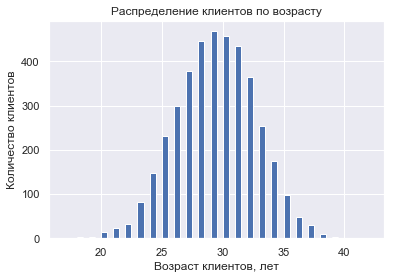

In [6]:
# смотрим, как распределены клиенты по возрасту
print(df.age.describe())
plt.title('Распределение клиентов по возрасту')
plt.ylabel('Количество клиентов')
plt.xlabel('Возраст клиентов, лет')
df.age.hist(bins=50, range=(17,42))

count    4000.000000
mean        3.724750
std         3.749267
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        31.000000
Name: lifetime, dtype: float64


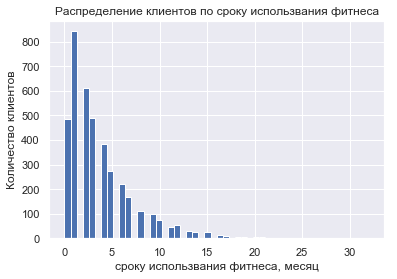

In [7]:
# смотрим, как распределены клиенты сроку использвания фитнеса
print(df.lifetime.describe())
plt.title('Распределение клиентов по сроку использвания фитнеса')
plt.ylabel('Количество клиентов')
plt.xlabel('сроку использвания фитнеса, месяц')
df.lifetime.hist(bins=50, range=(0,32))

count    4000.000000
mean        4.681250
std         4.549706
min         1.000000
25%         1.000000
50%         1.000000
75%         6.000000
max        12.000000
Name: contract_period, dtype: float64


<BarContainer object of 3 artists>

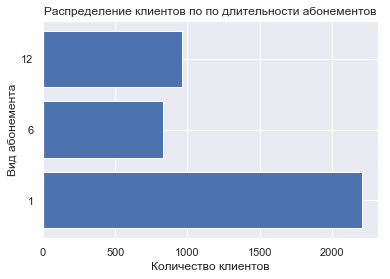

In [8]:
# смотрим, как распределены клиенты по длительности абонементов
print(df.contract_period.describe())
pivot = df.pivot_table(index='contract_period',
                       values='age',
                       aggfunc='count')
pivot.columns=['contract_period_count']
pivot=pivot.set_index([pd.Index(['1','6','12'])])
plt.title('Распределение клиентов по по длительности абонементов')
plt.ylabel('Вид абонемента')
plt.xlabel('Количество клиентов')
plt.barh(pivot.index,
         pivot.contract_period_count)

count    4000.000000
mean        4.322750
std         4.191297
min         1.000000
25%         1.000000
50%         1.000000
75%         6.000000
max        12.000000
Name: month_to_end_contract, dtype: float64


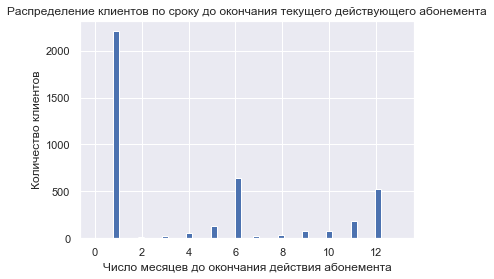

In [9]:
# смотрим, как распределены клиенты по сроку до окончания текущего действующего абонемента
print(df.month_to_end_contract.describe())
plt.title('Распределение клиентов по сроку до окончания текущего действующего абонемента')
plt.ylabel('Количество клиентов')
plt.xlabel('Число месяцев до окончания действия абонемента')
df.month_to_end_contract.hist(bins=50, range=(0,13))

count    4000.000000
mean      146.943728
std        96.355602
min         0.148205
25%        68.868830
50%       136.220159
75%       210.949625
max       552.590740
Name: avg_additional_charges_total, dtype: float64


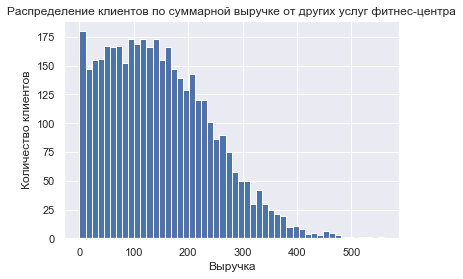

In [10]:
print(df.avg_additional_charges_total.describe())
plt.title('Распределение клиентов по суммарной выручке от других услуг фитнес-центра')
plt.ylabel('Количество клиентов')
plt.xlabel('Выручка')
df.avg_additional_charges_total.hist(bins=50, range=(0,560))

count    4000.000000
mean        1.879020
std         0.972245
min         0.000000
25%         1.180875
50%         1.832768
75%         2.536078
max         6.023668
Name: avg_class_frequency_total, dtype: float64


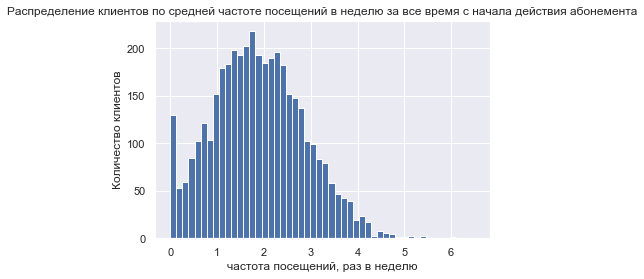

In [11]:
print(df.avg_class_frequency_total.describe())
plt.title('Распределение клиентов по средней частоте посещений в неделю за все время с начала действия абонемента')
plt.ylabel('Количество клиентов')
plt.xlabel('частота посещений, раз в неделю')
df.avg_class_frequency_total.hist(bins=50, range=(0,6.5))

count    4000.000000
mean        1.767052
std         1.052906
min         0.000000
25%         0.963003
50%         1.719574
75%         2.510336
max         6.146783
Name: avg_class_frequency_current_month, dtype: float64


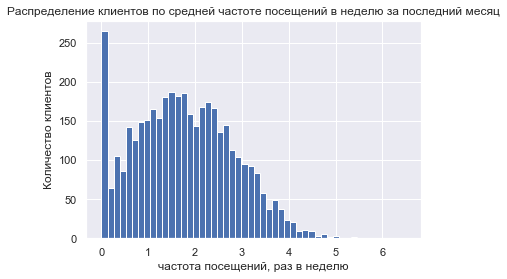

In [12]:
print(df.avg_class_frequency_current_month.describe())
plt.title('Распределение клиентов по средней частоте посещений в неделю за последний месяц')
plt.ylabel('Количество клиентов')
plt.xlabel('частота посещений, раз в неделю')
df.avg_class_frequency_current_month.hist(bins=50, range=(0,6.5))

count    4000.000000
mean        0.265250
std         0.441521
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: churn, dtype: float64


<BarContainer object of 2 artists>

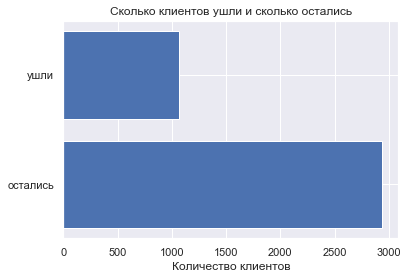

In [13]:
print(df.churn.describe())
pivot = df.pivot_table(index='churn',
                       values='age',
                       aggfunc='count')
pivot.columns=['churn_count']
pivot=pivot.set_index([pd.Index(['остались','ушли'])])
plt.title('Сколько клиентов ушли и сколько остались')
plt.xlabel('Количество клиентов')
plt.barh(pivot.index,
         pivot.churn_count)

**Вывод:**
* Клиенты по возрасту распределены нормально от 18 до 41 года
* По сроку использования фитнеса клиенты распределены нормально. Больше всего тех, кто ходит 1-2 месяца
* Больше половины клиентов предпочитают месячные абонементы. 6 и 12-месячные примерно поровну
* Срок до окончания абонемента у большего количества клиетов 1,6 и 12 месяцев - много новечков, подтверждение пункта 2
* Распределение клиентов по суммарной выручке от других услуг фитнес-центра близко к нормальному
* Распределение клиентов по средней частоте посещений в неделю за последний месяц и за все время близко к нормальному. Пики в нулевом значении говорят о том, что есть много клиентов, кто не посещает клуб, хотя официально его не покидал
* 25% клиентов полностью отказались от посещения клуба

### Сравнение тех, кто ушел в отток и тех, кто остался

In [14]:
pivot = (df
    .groupby('churn')
    .agg({'age':'mean',
          'avg_additional_charges_total':'mean',
          'month_to_end_contract':'mean',
          'lifetime':'mean',
          'avg_class_frequency_total':'mean',
          'avg_class_frequency_current_month':'mean'})
    .set_index([pd.Index(['остались','ушли'])])).T

pivot['разница,%'] = round(100*(pivot['остались'] - pivot['ушли'])/pivot['остались'])
pivot

,остались,ушли,"разница,%"
age,29.976523,26.989632,10.0
avg_additional_charges_total,158.445715,115.082899,27.0
month_to_end_contract,5.283089,1.662582,69.0
lifetime,4.711807,0.990575,79.0
avg_class_frequency_total,2.024876,1.474995,27.0
avg_class_frequency_current_month,2.027882,1.044546,48.0


**Выводы:**
* Те кто ушли в среднем на три года моложе чем те кто остались.
* Суммарная выручка от других услуг фитнес-центра среди тех, кто ушли на 27% ниже, чем у тех, кто остались.
* Срок до окончания текущего действующего абонемента среди тех, кто ушли на 69% меньше, чем у тех, кто остались.
* Время с момента первого обращения в фитнес-центр среди тех, кто ушли на 79% меньше, чем у тех, кто остались.
* Средняя частота посещений в неделю за все время с начала действия абонемента среди тех, кто ушли на 27% меньше, чем у тех, кто остались.
* Средняя частота посещений в неделю за предыдущий месяц среди тех, кто ушли на 48% меньше, чем у тех, кто остались.


In [15]:
characteristics=['gender',
                 'near_location', 
                 'partner', 
                 'promo_friends', 
                 'phone', 
                 'contract_period', 
                 'group_visits',
                 'age',
                 'avg_additional_charges_total',
                 'month_to_end_contract',
                 'lifetime',
                 'avg_class_frequency_total',
                 'avg_class_frequency_current_month']

Распределение клиентов по характеристике gender


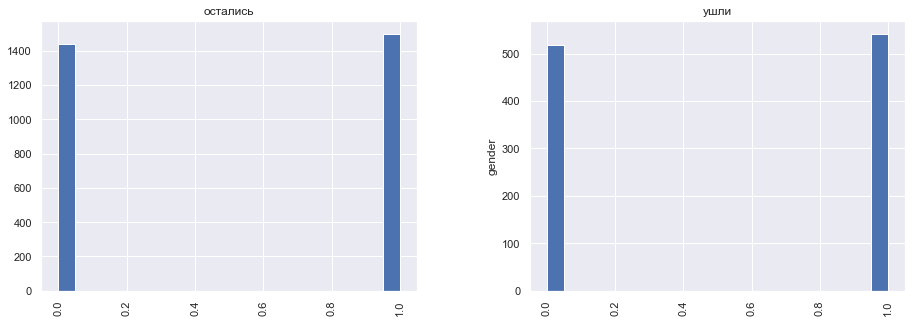

Распределение клиентов по характеристике near_location


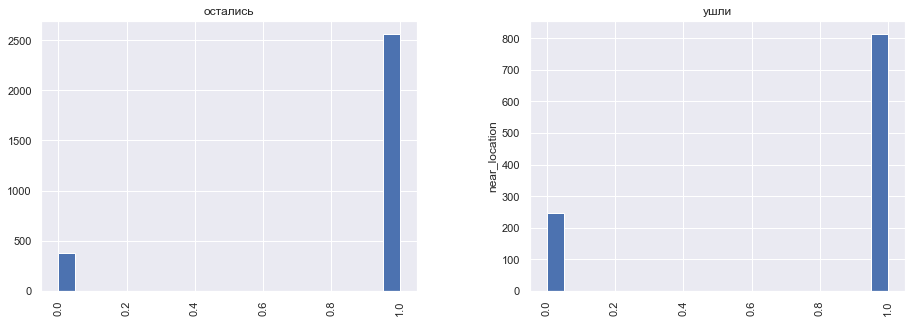

Распределение клиентов по характеристике partner


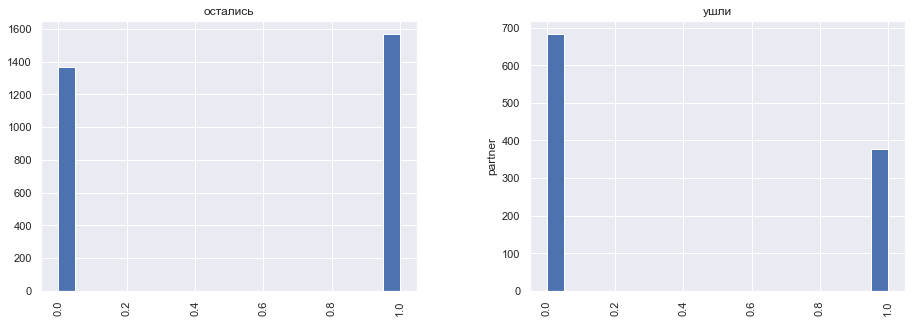

Распределение клиентов по характеристике promo_friends


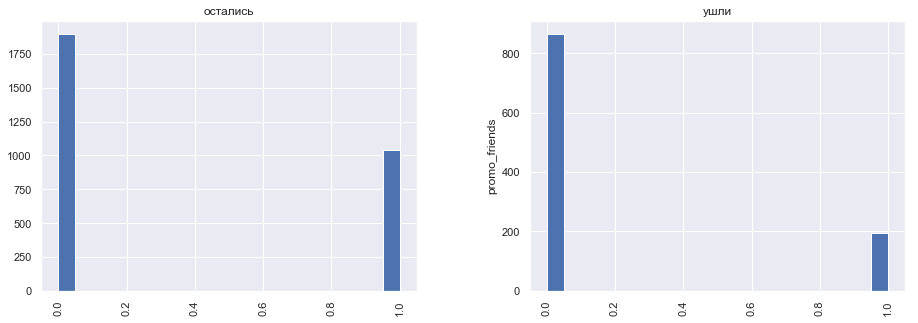

Распределение клиентов по характеристике phone


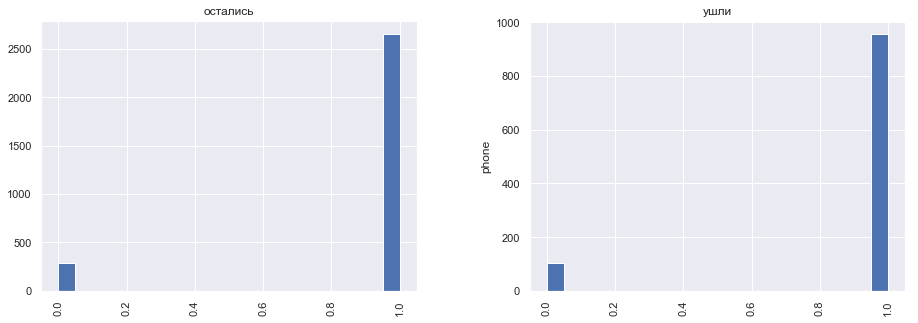

Распределение клиентов по характеристике contract_period


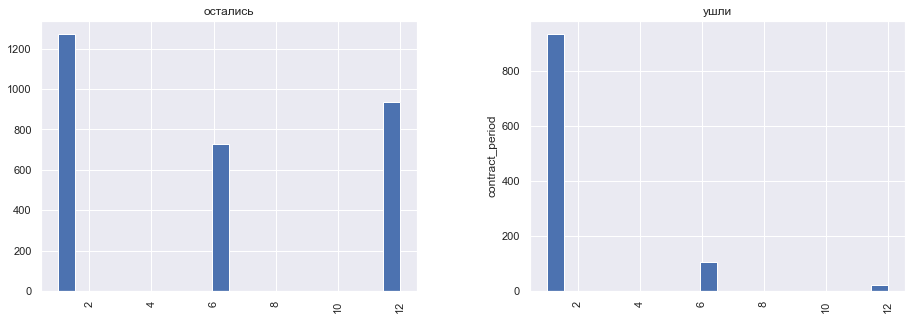

Распределение клиентов по характеристике group_visits


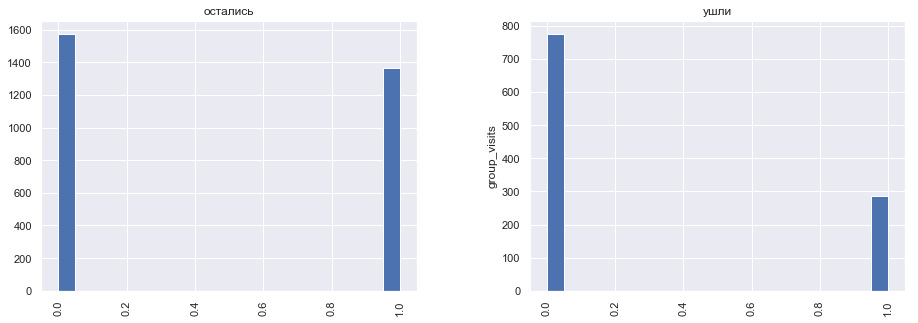

Распределение клиентов по характеристике age


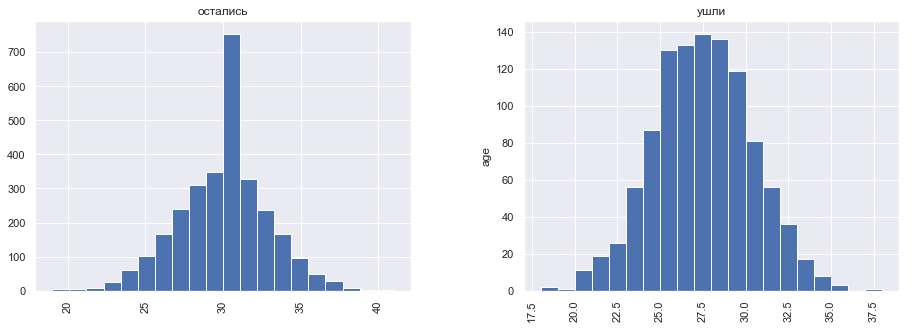

Распределение клиентов по характеристике avg_additional_charges_total


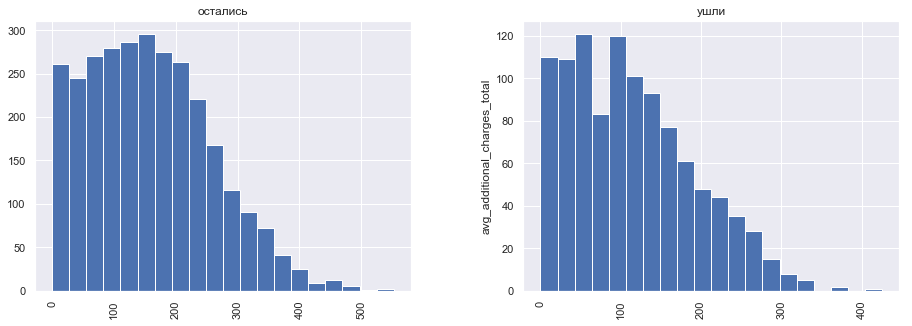

Распределение клиентов по характеристике month_to_end_contract


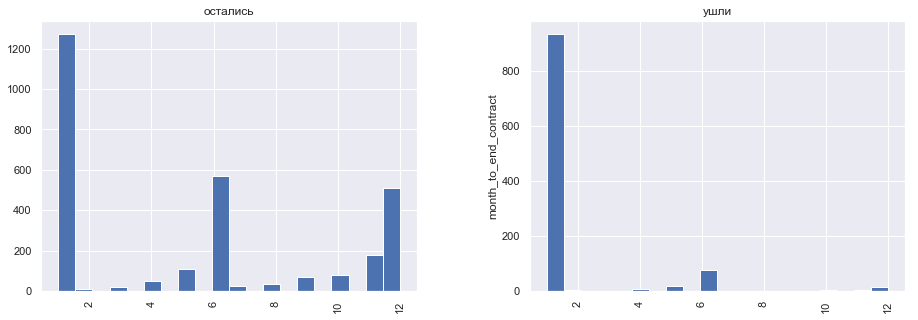

Распределение клиентов по характеристике lifetime


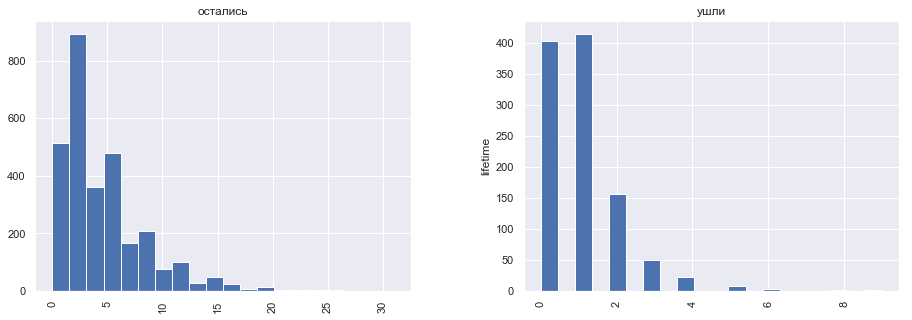

Распределение клиентов по характеристике avg_class_frequency_total


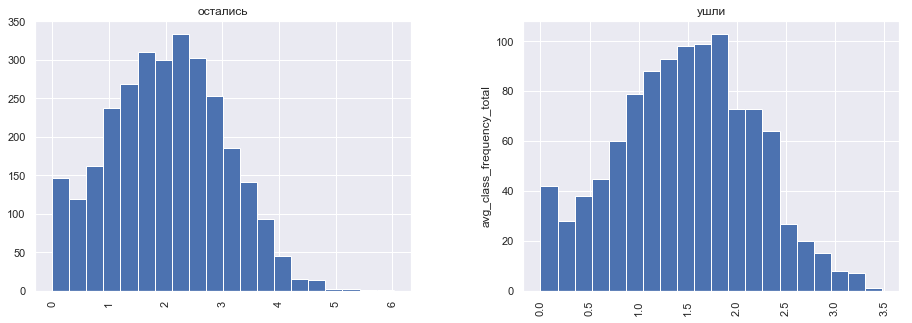

Распределение клиентов по характеристике avg_class_frequency_current_month


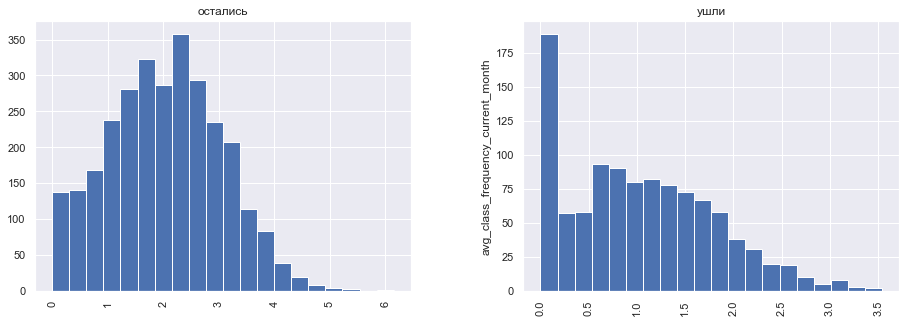

In [16]:
df_1 = df.copy()
df_1.churn = df_1.churn.replace({0:'остались',
                                 1:'ушли'})
def hist_stay_left(column):
    print('Распределение клиентов по характеристике', column)
    df_1[[column,'churn']].hist(figsize=(15, 5),
                                #range=(17,42),
                                bins=20, 
                                by='churn',
                                grid=True)   
    plt.ylabel(column)
    plt.show()
for i in characteristics:
    hist_stay_left(i)


**Вывод:**
* Среди ушедших преобладают те, кто не является участником партнерской программы, т.е. самостоятельные
* Длительный абонемент держит клиента. Среди ушедших он не был популярен. Так же как и 6-месячный.
* Среди ушедших меньше любителей групповых программ
* Ушедшие клиенты меньше покупали допуслуги, хотя и не значительно
* Решение прекратить посещать фитнес приходило к клиентам в течение 3 месяцев
* Ушедшие реже посещали фитнес
* Если если среди оставшихся клиентов посещаемость за все время и за последний месяц не отличается, то среди ушедших разница есть. У посещаемости за последний месяц - пик в нулевом значении. Т.е. клиент переставал ходить на занятия а потом заявлял что вообще больше не придет.

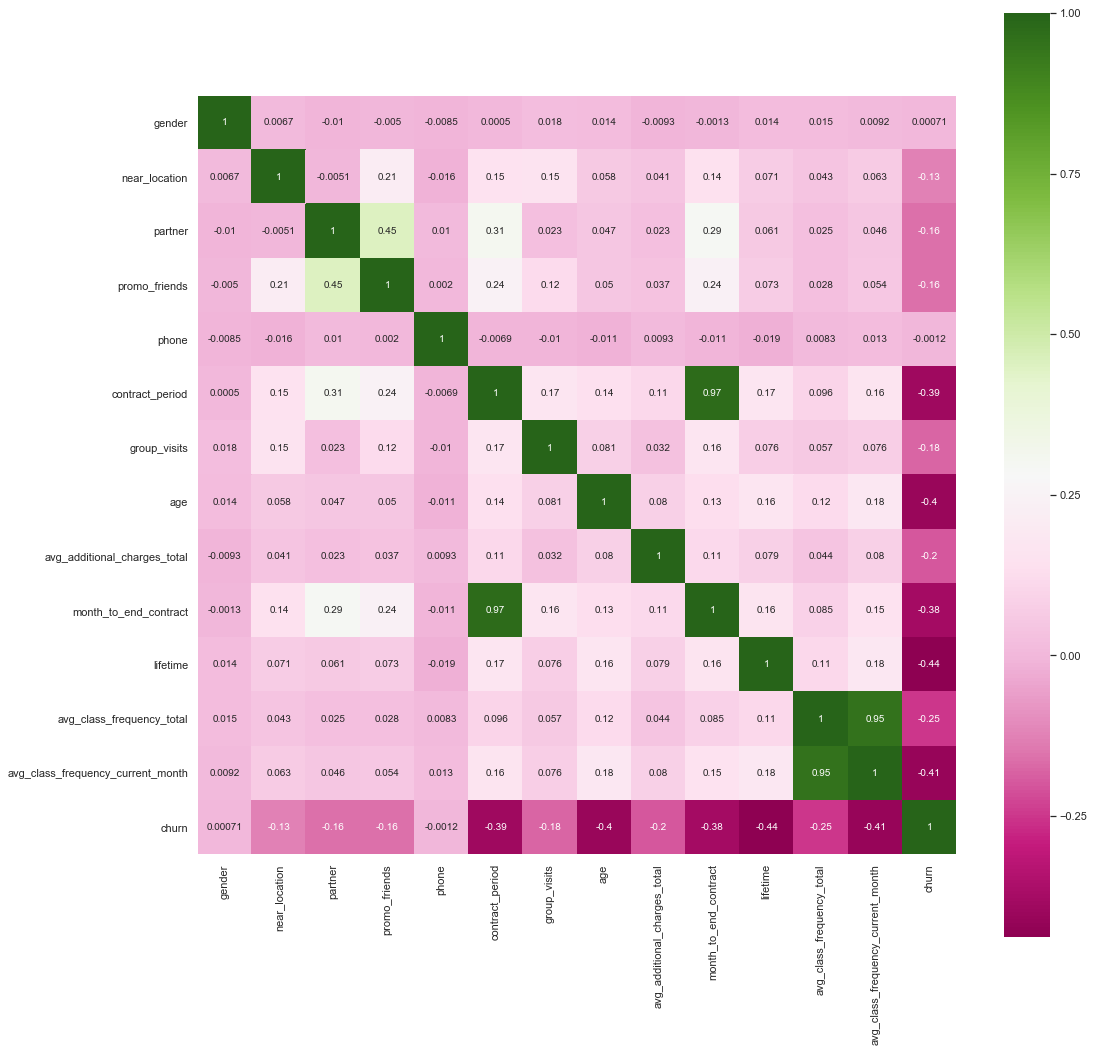

In [17]:
fig, ax = plt.subplots(figsize=(17,17))
#sns.diverging_palette(220, 20, as_cmap=True)
#color_palette("coolwarm", as_cmap=True)
sns.heatmap(df.corr(),
            square = True,
            annot = True,
            cmap="PiYG")

Есть две пары сильно коррелирующих признаков:

1. month_to_end_contract и contract_period
2. avg_class_frequency_total и avg_class_frequency_current_month

Для исключения негативного влияния мультиколлинеарности на результат обучения модели удаляем эти признаки

In [18]:
df_anticoll = df.drop(['contract_period',
                       'avg_class_frequency_total'], axis = 1)

**Вывод:**
Наиболее коррелирующие с фактом ушел/не ушел параметры: 
* avg_class_frequency_current_month (средняя частота посещений в неделю за предыдущий месяц), 
* lifetime (время с момента первого обращения в фитнес-центр (в месяцах), 
* month_to_end_contract (срок до окончания текущего действующего абонемента (в месяцах), 
* age (возраст), 
* contract_period (длительность текущего действующего абонемента)

## Построение моделей прогнозирования оттока клиентов

In [19]:
# разделяем наши данные на признаки (матрица X) и целевую переменную (y)
X = df_anticoll.drop('churn', axis = 1)
y = df_anticoll['churn']

# разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    stratify=y)

# стандартизация данных перед работой с алгоритмами
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()


Модель логистической регрессии

In [20]:
# алгоритм логистической регрессии
model = LogisticRegression(solver='liblinear') 

# обучите модель
model.fit(X_train_st, y_train)

# воспользуйтесь уже обученной моделью, чтобы сделать прогнозы
predictions = model.predict(X_test_st)
probabilities = model.predict_proba(X_test_st)[:,1]

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions)))

Accuracy: 0.92
Precision: 0.84
Recall: 0.84
F1: 0.84


Модель случайного леса

In [21]:
# зададим алгоритм для новой модели на основе алгоритма случайного леса
model = RandomForestClassifier(n_estimators = 100, random_state = 0) 

# обучим модель случайного леса
model.fit(X_train_st, y_train)

# воспользуемся уже обученной моделью, чтобы сделать прогнозы
predictions = model.predict(X_test_st) 
probabilities = model.predict_proba(X_test_st)[:, 1]

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions)))

Accuracy: 0.91
Precision: 0.85
Recall: 0.80
F1: 0.82


**Вывод:**
Обе модели дают почти одинаковый результат. Минимальный перевес в пользу логистической регрессии

##  Кластеризация клиентов
### Матрица расстояний и дендрограмма 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


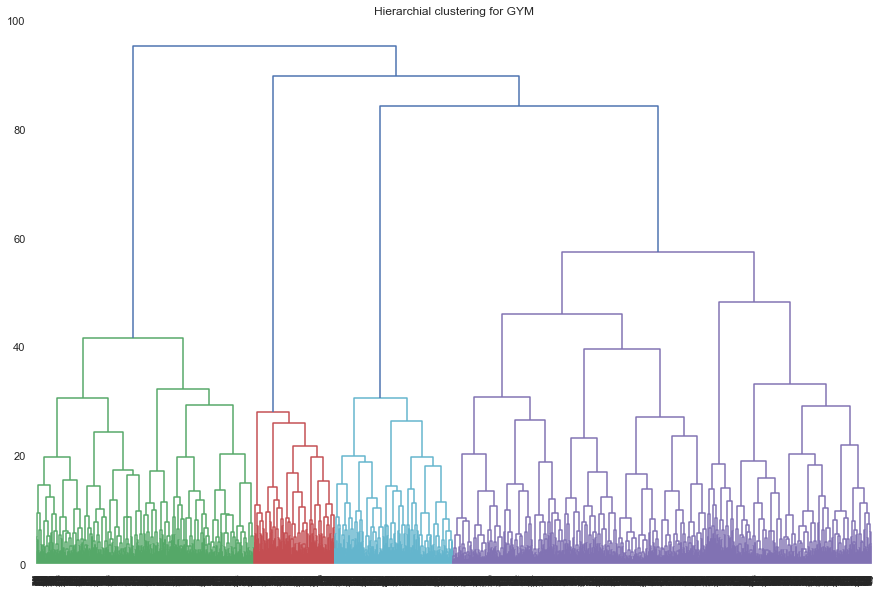

In [22]:
# обязательная стандартизация данных перед работой с алгоритмами
sc = StandardScaler()
X_sc = sc.fit_transform(X)

linked = linkage(X_sc, method = 'ward') 

plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering for GYM')
plt.show() 

**Вывод:** Алгоритм предлагает выделить 4 кластера клиентов

### Модель кластеризации на основании алгоритма K-Means

In [23]:
km = KMeans(n_clusters=5, random_state=0) # задаём число кластеров, равное 5, 
                                          # и фиксируем значение random_state для воспроизводимости результата
labels = km.fit_predict(X_sc) # применяем алгоритм к данным и формируем вектор кластеров 

# сохраняем метки кластера в поле нашего датасета
df['cluster_km'] = labels

# выводим статистику по средним значениям наших признаков по кластеру
clusters = df.groupby(['cluster_km']).mean()
display(clusters)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.492000,0.994000,0.953000,1.000000,0.906000,7.346000,0.528000,29.633000,154.086252,6.730000,4.287000,1.960141,1.919105,0.108000
1,0.495352,0.998672,0.378486,0.046481,0.903054,5.059761,0.000000,30.342629,174.392898,4.698539,5.166003,2.240956,2.237272,0.046481
2,0.510507,1.000000,0.224969,0.114957,0.899876,1.797281,0.187886,26.800989,111.061687,1.710754,1.422744,1.330053,0.984420,0.740420
3,0.502455,0.000000,0.489362,0.072013,0.913257,2.996727,0.232406,28.700491,137.375245,2.826514,3.027823,1.768079,1.599583,0.400982
4,0.551391,0.998791,0.275695,0.074970,0.897219,5.180169,1.000000,30.275695,155.484435,4.730351,4.499395,2.070362,2.044372,0.089480


На основании средних значений признаков для кластеров можно приблизительно охарактеризовать полученные группы:

***Группа 0 - самые лояльные клиенты:***

* пользователи приемущественно из числа сотрудников компаний-партнёров клуба, пришедшие по акции "приведи друга". 
* Преимущественно обладатели годовых абонементов. 
* До окончания абонемента им еще далеко.
* Посещают занятия регулярно, примерно 2 раза в неделю. 
* **Наменьшая доля покинувших клуб** 


***Группа 1:*** 

* Клиенты из этой группы не оставляют номер своего телефона
* Преимущественно обладатели 6-месячных абонементов. 
* В остальном, не обладают какими-то ярко выраженными характеристиками


***Группа 2 - проблемная группа, велика вероятность ухода:*** 

* Жители отдаленных от фитнес-центра районов 
* Пришли в клуб без участия в акции "Приведи друга"
* Не любят групповые занятия
* Предпочитают месячные и полугодовые абонементы
* **Доля покинувших клуб близка к 50%** 


***Группа 3 - проблемная группа, велика вероятность ухода:*** 

* В этой группе клиентов, использующих месячные абонементы, больше, чем в других группах
* Посещают клуб реже, чем клиенты из других групп
* Меньше, чем клиенты из других групп, пользуются дополнительными услугами
* **Наибольшая доля покинувших клуб** 


***Группа 4 - самые лояльные клиенты:*** 

* Посещают клуб чаще, чем клиенты из других групп
* **Как и в группе 0 доля клиентов прекративших занятия очень мала**

**Вывод:** какой-то принципиально новой информации из графиков выявить не удалось. Они графически подтверждают характеристики групп, данные в предыдущем пункте.

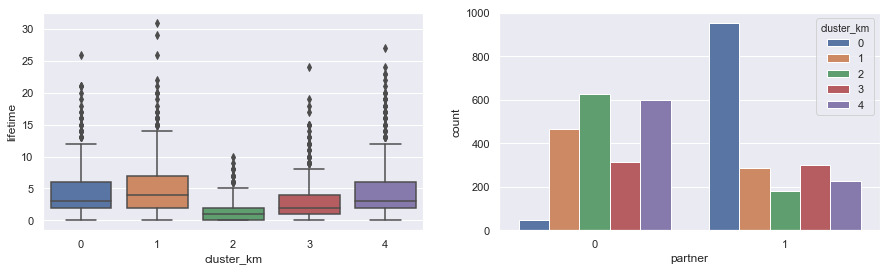

In [25]:
#Код ревьювера
plt.figure(figsize=(15, 4))
ax = plt.subplot(1, 2, 1)
sns.boxplot(x=df['cluster_km'], y=df['lifetime'])
ax = plt.subplot(1, 2, 2)
sns.countplot(data=df, x='partner', hue='cluster_km');

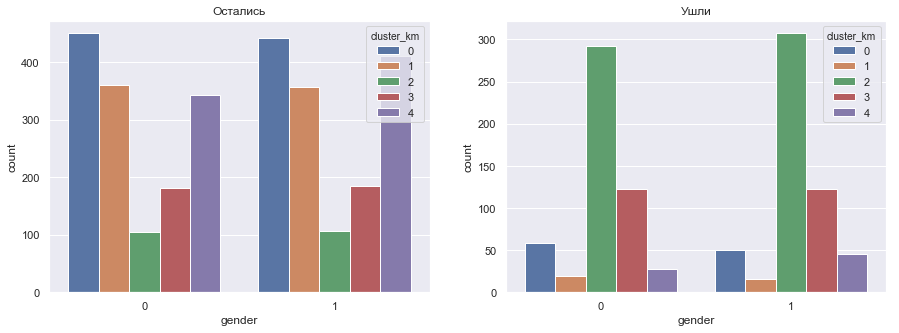

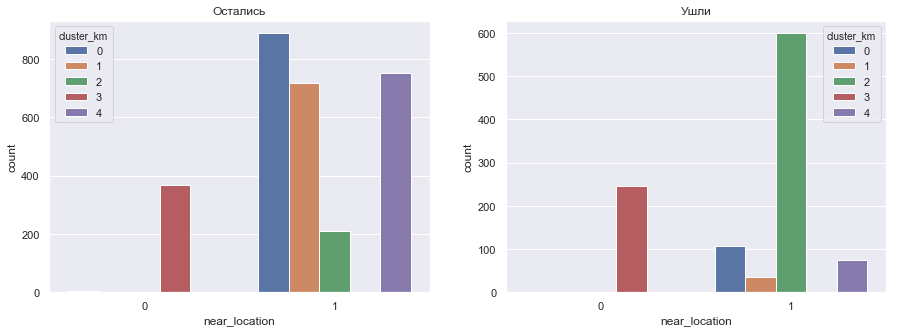

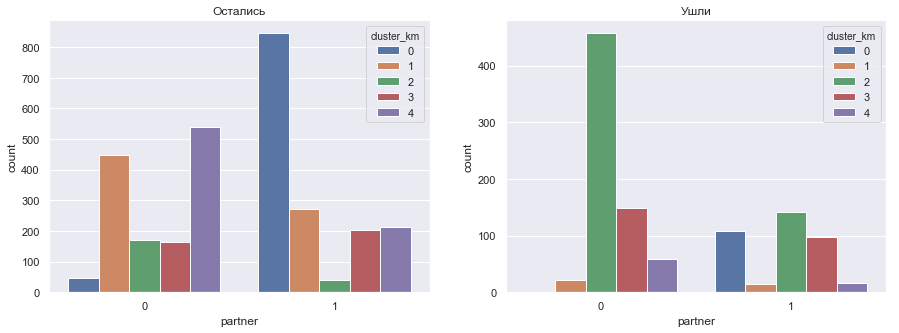

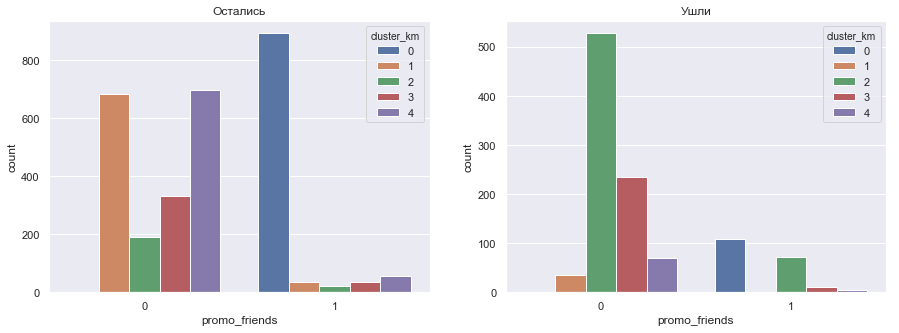

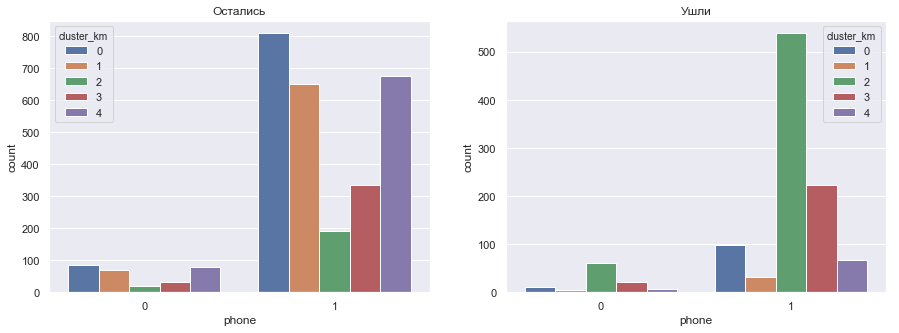

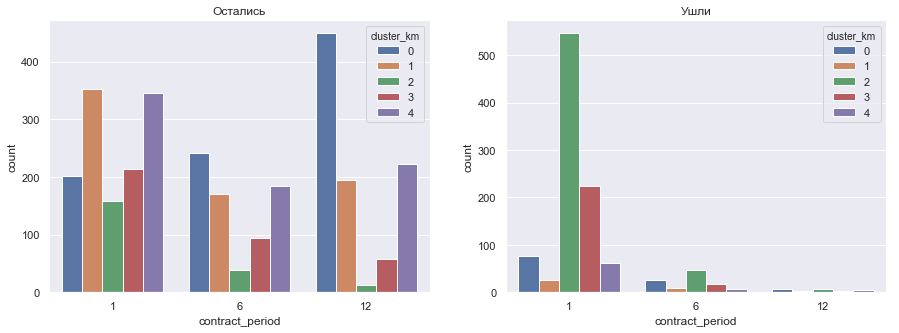

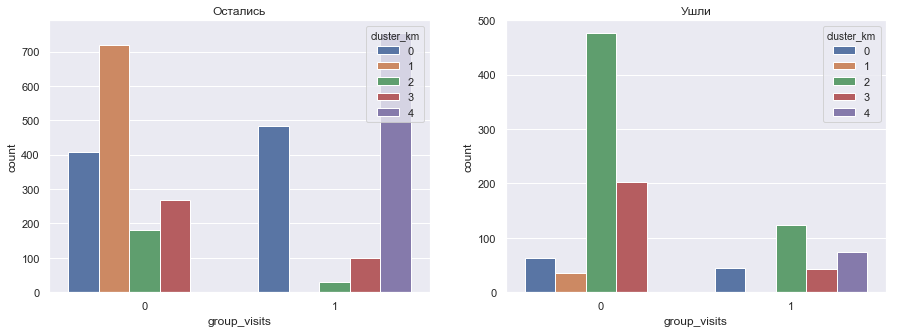

In [26]:
# графики для категориальных характеристик
for column in ['gender',
               'near_location', 
               'partner', 
               'promo_friends', 
               'phone',
               'contract_period',
               'group_visits']:
    #print('Признак', column)
    plt.figure(figsize=(15, 5))
    for ch in [0,1]:
        plt.subplot(1, 2, ch+1)
        sns.countplot(data=df.query('churn==@ch'), x=column, hue='cluster_km')
        #sns.countplot(df.query('churn==@ch')[column], hue=df.cluster_km)
        if ch==0:
            plt.title('Остались')
        if ch==1:
            plt.title('Ушли')

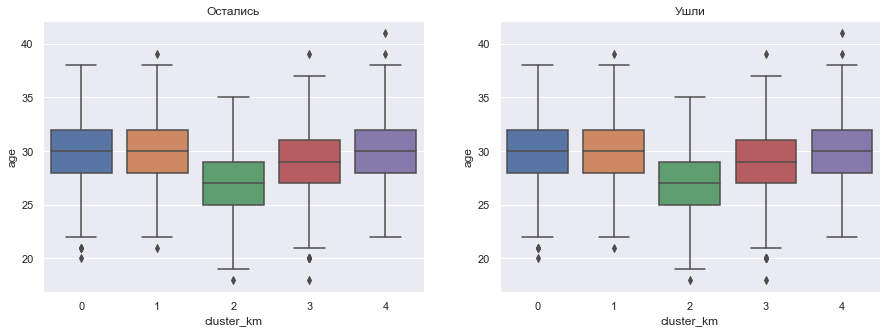

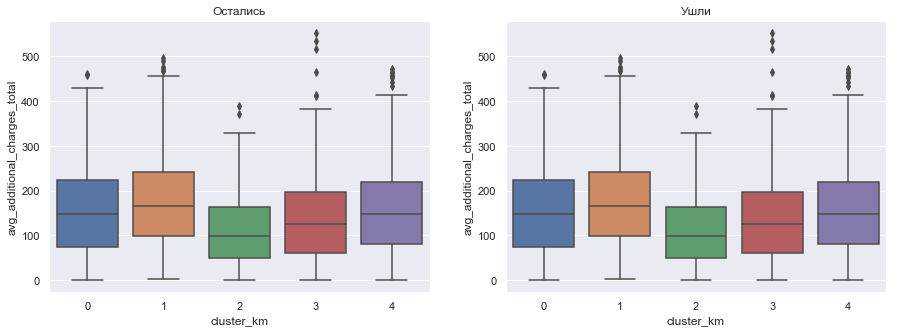

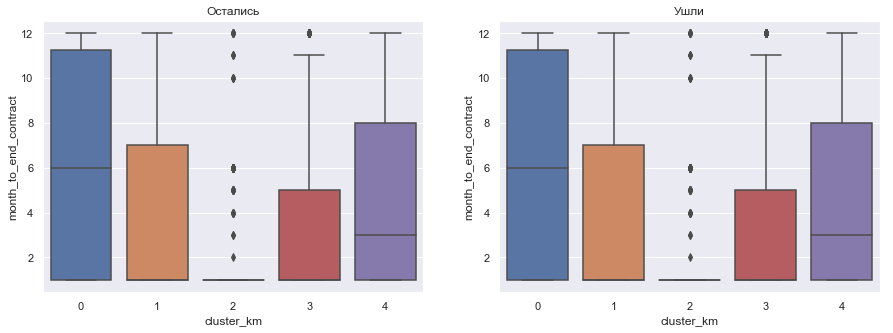

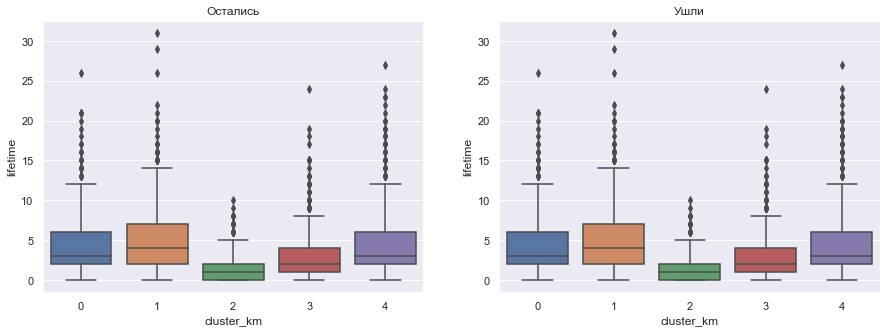

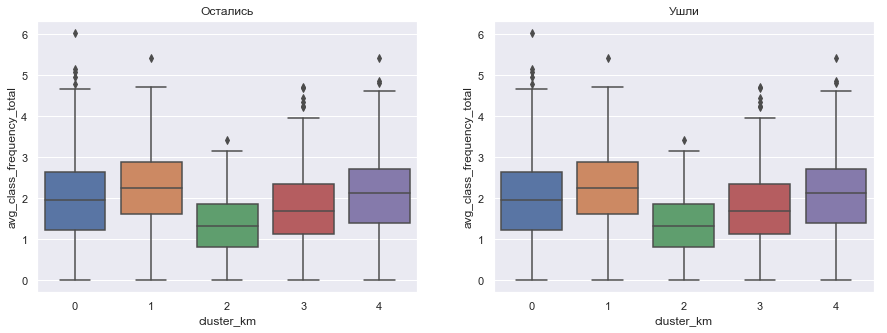

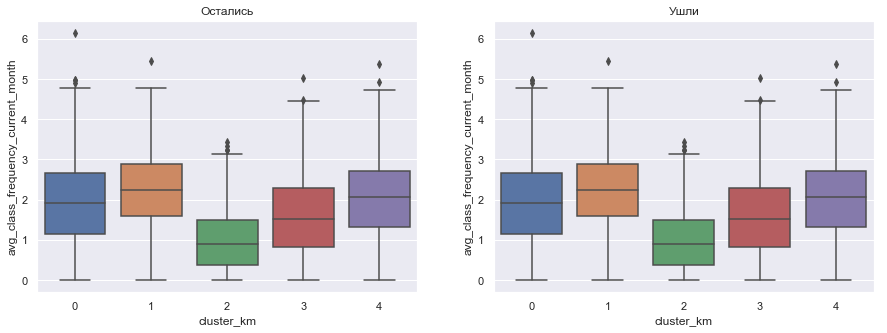

In [27]:
# графики для числовых характеристик
for column in ['age',
               'avg_additional_charges_total',
               'month_to_end_contract',
               'lifetime',
               'avg_class_frequency_total',
               'avg_class_frequency_current_month']:
    plt.figure(figsize=(15, 5))
    for ch in [0,1]:
        ax = plt.subplot(1, 2, ch+1)
        sns.boxplot(x=df['cluster_km'], y=df[column])
        if ch==0:
            plt.title('Остались')
        if ch==1:
            plt.title('Ушли')

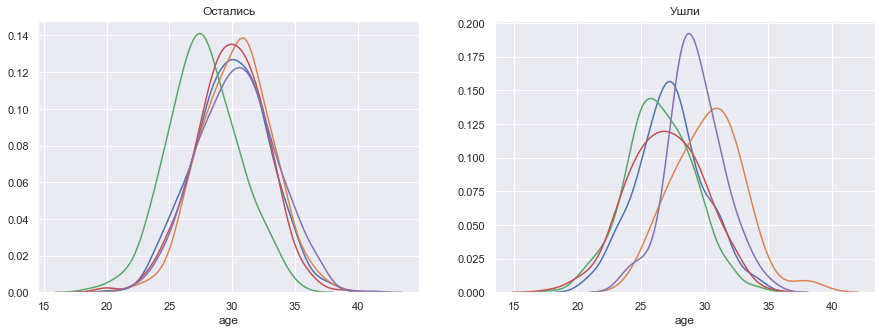

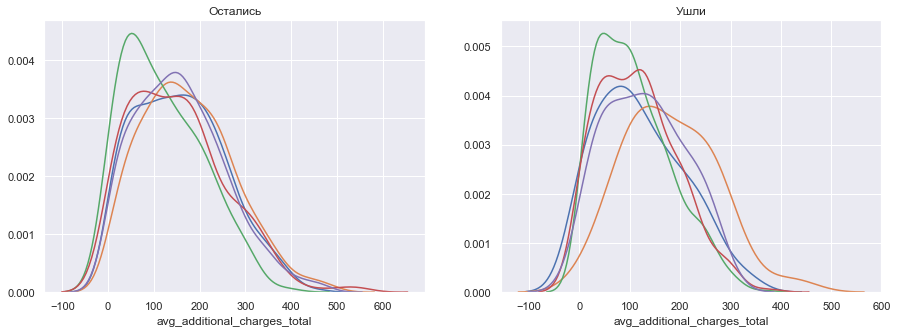

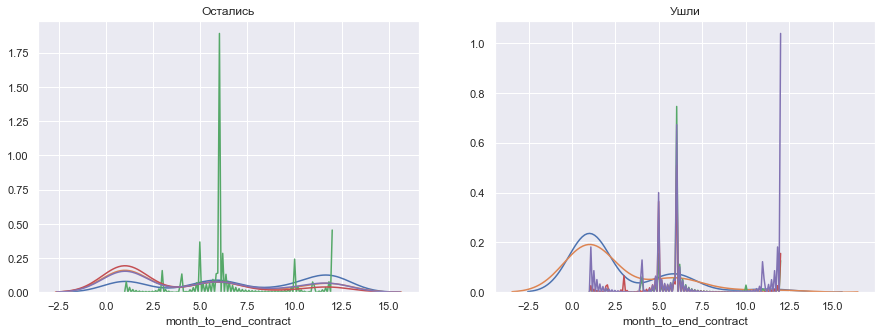

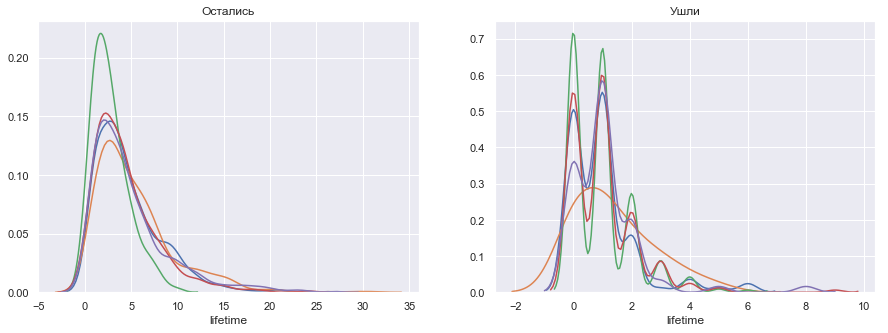

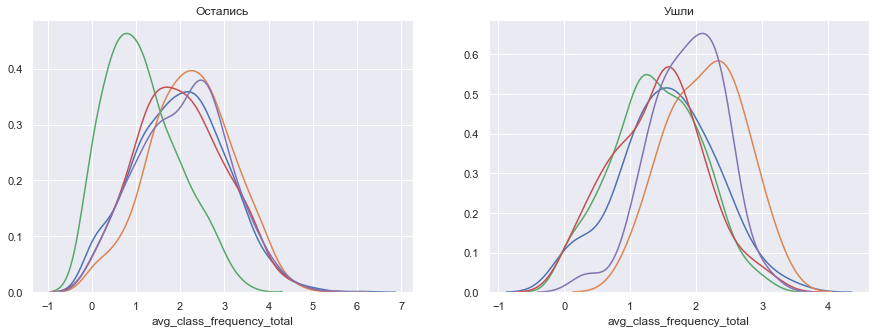

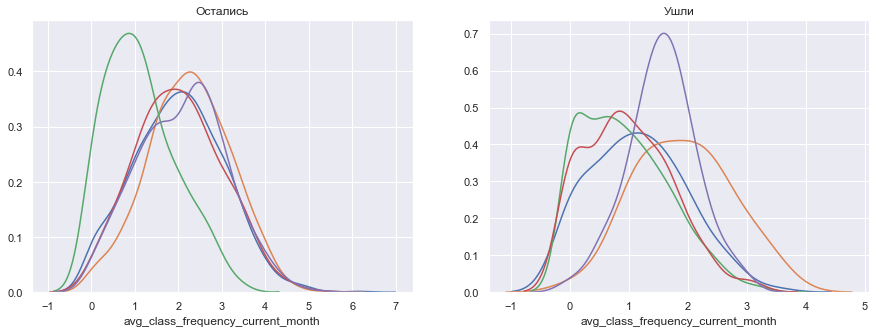

In [28]:
# графики для числовых характеристик
for column in ['age',
               'avg_additional_charges_total',
               'month_to_end_contract',
               'lifetime',
               'avg_class_frequency_total',
               'avg_class_frequency_current_month']:
    plt.figure(figsize=(15, 5))
    for ch in [0,1]:
        ax = plt.subplot(1, 2, ch+1)
        for i in [0,1,2,3,4]:
            sns.distplot(df.query('churn==@ch and cluster_km==@i')[column], hist=False)
        if ch==0:
            plt.title('Остались')
        if ch==1:
            plt.title('Ушли')

**Выводы из графиков:**
В целом графики подтверждают и иллюстрируют выводы, полученные из средних характеристик. Какой-то принципиально новой информации не просматривается.

In [29]:
# Для каждого полученного кластера считаем долю оттока
# Поскольку параметр churn принимает значения 0 или 1, долю можно вычислить функцией mean()
df.groupby('cluster_km').agg({'churn':'mean'})

,churn
cluster_km,
0,0.108000
1,0.046481
2,0.740420
3,0.400982
4,0.089480


**Вывод:** к оттоку склонны кластеры 2 и 3. 0 и 4 - напротив, самые лояльные клиенты 

## Общий вывод и рекомендации

Проведя предварительный анализ данных, определили примерный портрет клиента и особенности их пользования услугами фитнес-центра. Клиенты данного клуба - мужчины и женщины от 18 до 41 года. Посещают клуб как самостоятельно, так и в рамках партнерских программ. В основном, на данный момент ходят в клуб уже 1-3 месяца. Предпочитают месячные абонементы и ходят 1-3 раза в неделю. За исследуемый период 1/4 клиентов решили прекратить занятия и ушли из клуба. 

Ушедшие клиенты по сравнению с продолжающими занятия обладают следующими характеристиками:

* они моложе
* среди них больше самостоятельных клиентов (пришедших сами, а не по партнерке)
* критичный срок посещения для них 1-3 месяца занятий. После этого многие из них уходили
* они больше любят месячные абонементы
* они меньше любят групповые занятия
* они тратят меньше денег на допуслуги
* они посещали клуб реже
* перед уходом они сокращали частоту посещения клуба


На основании средних значений признаков всех клиентов можно разделить на 5 групп:

***Группа 0 - самые лояльные клиенты:***

* пользователи приемущественно из числа сотрудников компаний-партнёров клуба, пришедшие по акции "приведи друга". 
* Преимущественно обладатели годовых абонементов. 
* До окончания абонемента им еще далеко.
* Посещают занятия регулярно, примерно 2 раза в неделю. 
* **Наменьшая доля покинувших клуб** 


***Группа 1:*** 

* Клиенты из этой группы не оставляют номер своего телефона
* Преимущественно обладатели 6-месячных абонементов. 
* В остальном, не обладают какими-то ярко выраженными характеристиками


***Группа 2 - проблемная группа, велика вероятность ухода:*** 

* Жители отдаленных от фитнес-центра районов 
* Пришли в клуб без участия в акции "Приведи друга"
* Не любят групповые занятия
* Предпочитают месячные и полугодовые абонементы
* **Доля покинувших клуб близка к 50%** 


***Группа 3 - проблемная группа, велика вероятность ухода:*** 

* В этой группе клиентов, использующих месячные абонементы, больше, чем в других группах
* Посещают клуб реже, чем клиенты из других групп
* Меньше, чем клиенты из других групп, пользуются дополнительными услугами
* **Наибольшая доля покинувших клуб** 


***Группа 4 - самые лояльные клиенты:*** 

* Посещают клуб чаще, чем клиенты из других групп
* **Как и в группе 0 доля клиентов прекративших занятия очень мала** 



***РЕКОМЕНДАЦИИ***

Основа борьбы с оттоком клиентов - выявление их недовольства сервисом на ранних стадиях и адресное решение болей этих клиентов. Кластеризация на группы позволяет в первую очередь обратить внимание на клиентов из проблемных групп 2 и 3. В условиях ограниченности ресурсов усилия и средства для удержания должны быть сконцентрированы на клиентах их этих групп.
Характерные черты ушедших клиентов подсказывают, на что нужно обратить внимание при реализации политики повышения лояльности.
* Внедрить плюшки для молодой аудитории (как пример, скидки для студентов, фоловинг аккаунтов молодых клиентов в соцсетях, партенские программы с дискатеками, магазинами одежды и т.д.)
* Вовлечение самостоятельных клиентов в общие активности (при их желании) (например, организация команд, соревнований и т.д.)
* Внимание на клиентов, посещающих клуб 1-3 месяца. Больше с ними разговаривать, интересоваться, чего им не хватает, что хотелось бы улучшить. (плюс, например, акция - каждый четвертый месяц - скидка) 
* дополнительные бонусы при покупке длительных абонементов
* поработать с асортиментом допуслуг и групповых занятий. (Целесообразность не очевидна. Требуются опросы клиентов и просчет экономики.)
* внедрить еженедельный мониторинг частоты посещений. Выявлять клиентов, у которых частота посещений снижается, выяснять причины и предлагать им дополнительные плюшки.